# Exercicio 1

In [13]:
#Exercicios 1 e 2

import numpy as np


np.random.seed(0)  
w0, w1, w2 = np.random.uniform(-1, 1, 3)

input_patterns = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
desired_responses_or = np.array([-1, 1, 1, 1])  # OR operation

def activation_function(x):
    return 1 if x > 0 else -1

outputs_or = []
for pattern in input_patterns:
    x1, x2 = pattern
    net_input = w0 + w1 * x1 + w2 * x2
    output = activation_function(net_input)
    outputs_or.append(output)

outputs_or  # The calculated outputs for each input pattern for OR operation



[-1, -1, 1, 1]

In [4]:
#Exercicio 3

# Calculate the error for each output for OR operation
errors_or = desired_responses_or - np.array(outputs_or)
errors_or  

array([0, 2, 0, 0])

In [14]:
#Exercicio 4

alpha = 10E-4

delta_w0, delta_w1, delta_w2 = 0, 0, 0

for pattern, error in zip(input_patterns, errors_or):
    x1, x2 = pattern
    delta_w0 += alpha * error
    delta_w1 += alpha * x1 * error
    delta_w2 += alpha * x2 * error

(delta_w0, delta_w1, delta_w2)  



(0.002, -0.002, 0.002)

In [23]:
#Exercicio 5a

def train_perceptron(input_patterns, desired_responses, alpha, max_epochs=1000):
    np.random.seed()  # Random seed for different initial weights each time
    w0, w1, w2 = np.random.uniform(-1, 1, 3)

    for epoch in range(max_epochs):
        delta_w0, delta_w1, delta_w2 = 0, 0, 0
        all_correct = True

        for pattern, desired_output in zip(input_patterns, desired_responses):
            x1, x2 = pattern
            actual_output = activation_function(w0 + w1 * x1 + w2 * x2)
            error = desired_output - actual_output

            if error != 0:
                all_correct = False

            delta_w0 += alpha * error
            delta_w1 += alpha * x1 * error
            delta_w2 += alpha * x2 * error

        w0 += delta_w0
        w1 += delta_w1
        w2 += delta_w2

        if all_correct:
            return epoch + 1

    return max_epochs


epochs_to_converge = [train_perceptron(input_patterns, desired_responses_or, alpha) for _ in range(30)]

average_epochs = np.mean(epochs_to_converge)
std_deviation_epochs = np.std(epochs_to_converge)

print("Average epochs to converge:", average_epochs)
print("Standard deviation:", std_deviation_epochs)


Average epochs to converge: 10.766666666666667
Standard deviation: 7.561672360588555


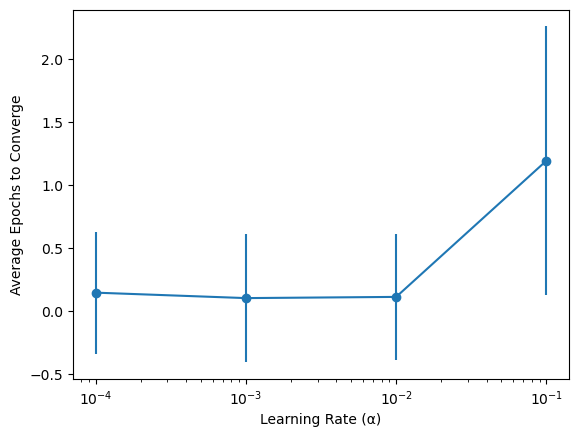

In [30]:
#Exercicio 5b

import numpy as np
import matplotlib.pyplot as plt

alphas = [0.0001, 0.001, 0.01, 0.1]
average_epochs_list = []
std_deviation_list = []

for alpha in alphas:
    epochs_to_converge = [train_perceptron(input_patterns, desired_responses_or, alpha) for _ in range(30)]
    average_epochs = np.mean(epochs_to_converge)
    std_deviation_epochs = np.std(epochs_to_converge)

    average_epochs_list.append(average_epochs)
    std_deviation_list.append(std_deviation_epochs)

# Plotting the results
plt.errorbar(alphas, average_epochs_list, yerr=std_deviation_list, fmt='-o')
plt.xlabel('Learning Rate (α)')
plt.ylabel('Average Epochs to Converge')
plt.xscale('log')  # Since alphas vary in orders of magnitude
plt.show()


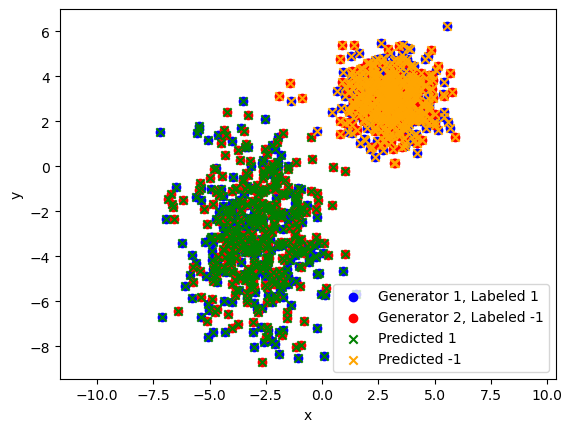

In [27]:
#Exercicio 6

import matplotlib.pyplot as plt
import numpy as np

mean1, cov1 = [3, 3], [[1, 0], [0, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 500).T

mean2, cov2 = [-3, -3], [[2, 0], [0, 5]]
data2 = np.random.multivariate_normal(mean2, cov2, 500).T

data = np.concatenate((data1, data2), axis=1)
np.random.shuffle(data.T)

labels = np.array([1]*500 + [-1]*500)
np.random.shuffle(labels)

def activation_function(x):
    return 1 if x > 0 else -1

def train_perceptron(input_patterns, desired_responses, alpha, max_epochs=1000):
    np.random.seed()  
    w0, w1, w2 = np.random.uniform(-1, 1, 3)

    for epoch in range(max_epochs):
        delta_w0, delta_w1, delta_w2 = 0, 0, 0
        all_correct = True

        for pattern, desired_output in zip(input_patterns, desired_responses):
            x1, x2 = pattern
            actual_output = activation_function(w0 + w1 * x1 + w2 * x2)
            error = desired_output - actual_output

            if error != 0:
                all_correct = False

            delta_w0 += alpha * error
            delta_w1 += alpha * x1 * error
            delta_w2 += alpha * x2 * error

        w0 += delta_w0
        w1 += delta_w1
        w2 += delta_w2

        if all_correct:
            return w0, w1, w2

    return w0, w1, w2

input_patterns = np.column_stack((data[0], data[1]))
desired_responses = labels

alpha = 0.01
w0, w1, w2 = train_perceptron(input_patterns, desired_responses, alpha)

predicted_labels = np.array([activation_function(w0 + w1 * x + w2 * y) for x, y in zip(data[0], data[1])])

plt.scatter(data[0, labels == 1], data[1, labels == 1], c='blue', label='Generator 1, Labeled 1')
plt.scatter(data[0, labels == -1], data[1, labels == -1], c='red', label='Generator 2, Labeled -1')
plt.scatter(data[0, predicted_labels == 1], data[1, predicted_labels == 1], c='green', marker='x', label='Predicted 1')
plt.scatter(data[0, predicted_labels == -1], data[1, predicted_labels == -1], c='orange', marker='x', label='Predicted -1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()


# Exercicio 2

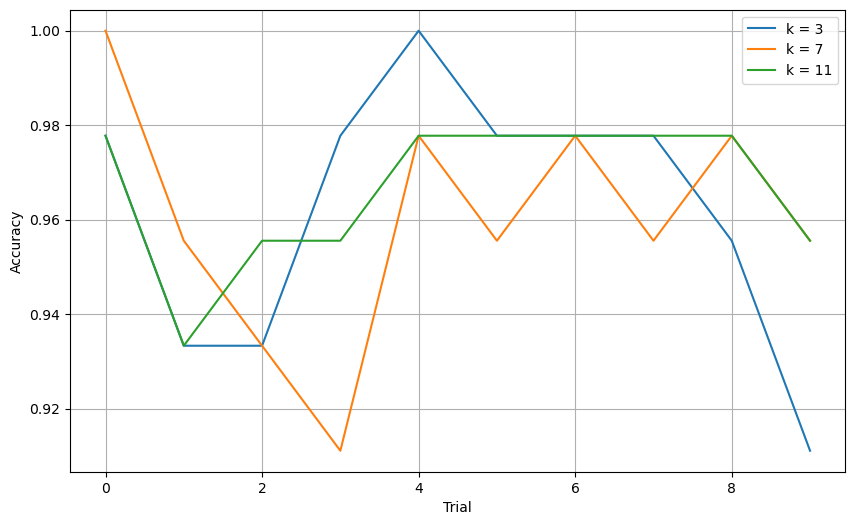

{3: [0.9777777777777777,
  0.9333333333333333,
  0.9333333333333333,
  0.9777777777777777,
  1.0,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9555555555555556,
  0.9111111111111111],
 7: [1.0,
  0.9555555555555556,
  0.9333333333333333,
  0.9111111111111111,
  0.9777777777777777,
  0.9555555555555556,
  0.9777777777777777,
  0.9555555555555556,
  0.9777777777777777,
  0.9555555555555556],
 11: [0.9777777777777777,
  0.9333333333333333,
  0.9555555555555556,
  0.9555555555555556,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9555555555555556]}

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

k_values = [3, 7, 11]

results = {k: [] for k in k_values}

for k in k_values:
    for _ in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)

        accuracy = classifier.score(X_test, y_test)
        results[k].append(accuracy)

plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(results[k], label=f'k = {k}')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

results



O k deve ser sempre um numero impar para evitar empates, ou seja, visto que o k-NN classifica um novo ponto baseado na maioria dos votos dos seus k vizinhos mais próximos, ao usar um numero impar asseguramo-nos de que haverá sempre uma maioria clara. 

# Exercicio 3

C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


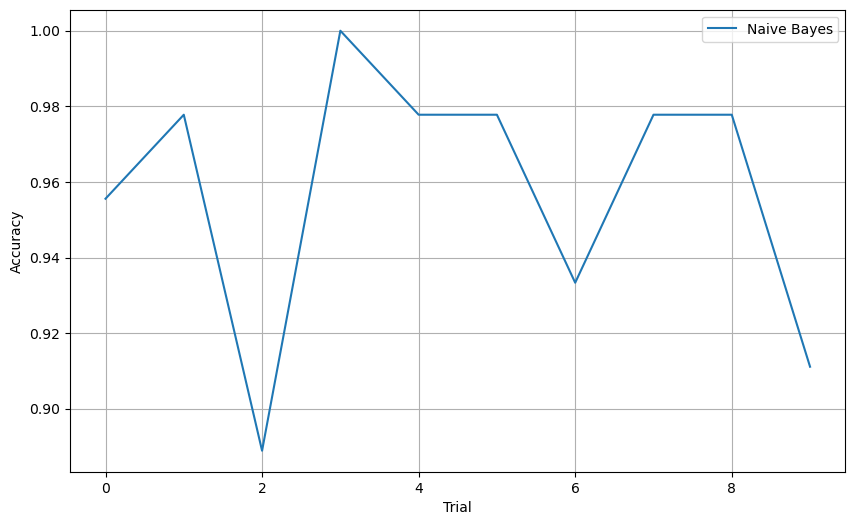

[0.9555555555555556,
 0.9777777777777777,
 0.8888888888888888,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9333333333333333,
 0.9777777777777777,
 0.9777777777777777,
 0.9111111111111111]

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

naive_bayes_classifier = GaussianNB()

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

X_discretized = discretizer.fit_transform(X)

naive_bayes_results = []

for _ in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X_discretized, y, test_size=0.3)

    naive_bayes_classifier.fit(X_train, y_train)

    accuracy = naive_bayes_classifier.score(X_test, y_test)
    naive_bayes_results.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(naive_bayes_results, label='Naive Bayes')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

naive_bayes_results

Comparando os resultados dos 2 métodos, pode-se chegar à conclusão de que, ambos os classificadores atingiram uma alta exatidão com este dataset.
No caso do Naive-Bayes os resultados sugerem que este é efetivo mesmo depois de transformar as variáveis continuas em categóricas, isso pode ser explicado pela distribuição subjacente dos dados e pela eficácia do Naive Bayes no tratamento de dados categóricos.
Já quanto ao kNN, este funciona por identificação dos pontos mais próximos, prevendo assim a classe baseado na classe com maior maioria destes "vizinhos" mais próximos. Por isso, funciona bem para este dataset da iris, visto que, a similaridade das instancias entre a mesma espécie e a distinção entre espécies diferentes são bem capturadas pelas métricas usadas no kNN.